<a href="https://colab.research.google.com/github/educhel/L03_Data_Analysis/blob/main/0114_%EA%B0%95%EC%9D%98%EC%A7%84%ED%96%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

복습
===

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(참고)
현재 내가 있는 위치 변경

-> 상대경로 접근 가능하도록

In [ ]:
import os
os.chdir('/content/drive/MyDrive/새싹2기/데이터분석/data/')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/새싹2기/데이터분석/data'

In [ ]:
import pandas as pd

tips = pd.read_csv('./preprocess_tips.csv',index_col=0)

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
53,9.94,1.56,Male,False,Sun,Dinner Dinner,2
148,9.78,NaN,Male,False,Thur,Lunch Lunch,2
43,9.68,1.32,NaN,False,Sun,Dinner Dinner,2
178,9.60,4.00,FEMALE,Yes,Sun,Dinner Dinner,2
30,9.55,1.45,Male,False,Sat,Dinner Dinner,2


In [ ]:
tips.reset_index(drop=True,inplace=True)

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,9.94,1.56,Male,False,Sun,Dinner Dinner,2
1,9.78,NaN,Male,False,Thur,Lunch Lunch,2
2,9.68,1.32,NaN,False,Sun,Dinner Dinner,2
3,9.60,4.00,FEMALE,Yes,Sun,Dinner Dinner,2
4,9.55,1.45,Male,False,Sat,Dinner Dinner,2


In [ ]:
tips.shape

(244, 7)

In [ ]:
tips.dtypes

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,int64


중복이 있나요?

In [ ]:
# 각 행별 중복 여부 확인 가능
tips.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
239,False
240,False
241,False
242,False


In [ ]:
tips.duplicated().sum()

np.int64(1)

In [ ]:
tips_clean = tips.drop_duplicates().copy()
tips_clean.shape

(243, 7)

구조적 오류

- sex : 대소문자 혼용 -> 소문자 일치
    - Series.str.lower()
- smoker : 문자열 False / Yes -> 케이스 일치
    - 방법 1. `bool` 으로 바꾸기 (True, False)
        - -> 값 변환 (map 메서드)
    - 방법 2. `str`으로 바꾸기 (Yes, No)
        - -> 문자열 처리 Series.str.replace()
- time :

In [ ]:
tips_clean.head()

,total_bill,tip,sex,smoker,day,time,size
0,9.94,1.56,Male,False,Sun,Dinner Dinner,2
1,9.78,NaN,Male,False,Thur,Lunch Lunch,2
2,9.68,1.32,NaN,False,Sun,Dinner Dinner,2
3,9.60,4.00,FEMALE,Yes,Sun,Dinner Dinner,2
4,9.55,1.45,Male,False,Sat,Dinner Dinner,2


In [ ]:
tips_clean.loc[:,'sex'] = tips_clean['sex'].str.lower()

In [ ]:
# map 으로 값변환 시에는 여러번 수행하게 되면 값을 잃을 수 있다.

tips_clean.loc[:,'smoker'] = tips_clean['smoker'].map({'False':False, 'Yes':True})

In [ ]:
tips_clean['smoker'].value_counts()

,count
smoker,
False,151
True,92


In [ ]:
# 조금 더 안전한 방법
tips_clean['day'].str.replace('Fri','금요일!!!!')

,day
0,Sun
1,Thur
2,Sun
3,Sun
4,Sat
...,...
239,Sun
240,Sun
241,금요일!!!!
242,Thur


In [ ]:
# 문자열이 의미를 담고 있지 못한다.
tips_clean['day'].value_counts(dropna=False, sort=False)

,count
day,
Sun,76
Thur,61
Sat,87
Fri,19


In [ ]:
# 문자열이 추가적인 의미를 담도록 "범주형"으로 형변환
# 이경우에는 순서, 의미들을 임의대로 판단하여 제작
# => 의미를 직접 담기 곤란
print(tips_clean['day'].astype('category'))

0       Sun
1      Thur
2       Sun
3       Sun
4       Sat
       ... 
239     Sun
240     Sun
241     Fri
242    Thur
243     Sat
Name: day, Length: 243, dtype: category
Categories (4, object): ['Fri', 'Sat', 'Sun', 'Thur']


In [ ]:
tips_clean.loc[:,'day'] = pd.Categorical(tips_clean['day'],
                                   categories=['Thur','Fri','Sat','Sun'],
                                   ordered=True)

In [ ]:
print(tips_clean.loc[:,'day'])

0       Sun
1      Thur
2       Sun
3       Sun
4       Sat
       ... 
239     Sun
240     Sun
241     Fri
242    Thur
243     Sat
Name: day, Length: 243, dtype: object


In [ ]:
vc = tips_clean.loc[:,'day'].value_counts(sort=False)
vc

,count
day,
Sun,76
Thur,61
Sat,87
Fri,19


<Axes: xlabel='day'>

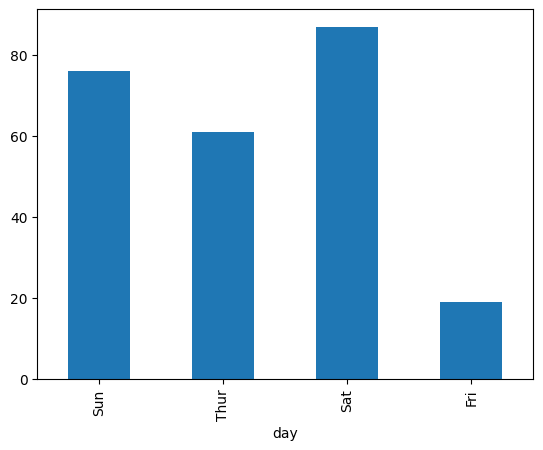

In [ ]:
# 장점 1: 고정된 기준으로 시각화 할 수 있다.
vc.plot.bar()

In [ ]:
# 장점 2 : 잘못된 수정이나 분석상의 실수를 막을 수 있다.

# tips_clean.loc[0, 'day'] = 'Mon'

In [ ]:
tips_clean.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,9.94,1.56,male,False,Sun,Dinner Dinner,2
1,9.78,NaN,male,False,Thur,Lunch Lunch,2
2,9.68,1.32,NaN,False,Sun,Dinner Dinner,2


In [ ]:
# 방법 1 : 분할
tips_clean['time'].str.split(' ',expand=True)[0]

,0
0,Dinner
1,Lunch
2,Dinner
3,Dinner
4,Dinner
...,...
239,Dinner
240,Dinner
241,Lunch
242,Lunch


In [ ]:
# 방법 2 : 대체
tips_clean.loc[:,'time'] = tips_clean['time'].str.replace('Dinner Dinner','Dinner')
tips_clean.loc[:,'time'] =  tips_clean['time'].str.replace('Lunch Lunch','Lunch')

In [ ]:
tips_clean.loc[:,'time'].value_counts()

,count
time,
Dinner,176
Lunch,67


In [ ]:
tips_clean.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,9.94,1.56,male,False,Sun,Dinner,2
1,9.78,NaN,male,False,Thur,Lunch,2


In [ ]:
tips_clean.isnull()

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


In [ ]:
tips_clean.isnull().sum()

,0
total_bill,0
tip,24
sex,24
smoker,0
day,0
time,0
size,0


In [ ]:
# 결측 발생을 열별로 합산
# 결측 발생한 열만 선택
# 결측의 발생 횟수를 전체 행의 갯수로 나눈다.

# 결측의 비율 확인 가능
ms = tips_clean.isnull().sum()
ms[ms > 0] / tips_clean.shape[0]

,0
tip,0.098765
sex,0.098765


<Axes: >

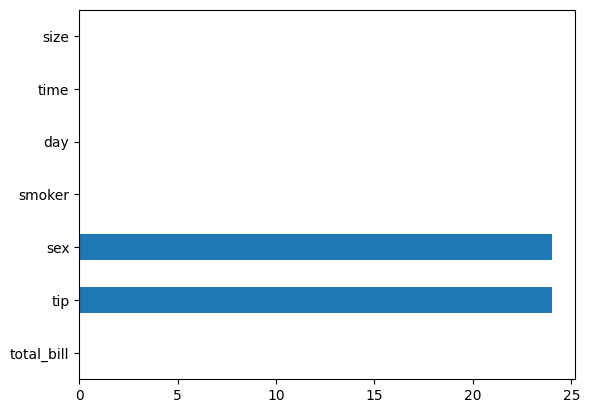

In [ ]:
ms.plot.barh()

결측치 처리

1. 결측 확인
2. 처리전략 선택
    - 삭제 : dropna()
    - 대체 : fillna()
    - 유지

In [ ]:
tips_clean['sex'].value_counts(dropna=False)

,count
sex,
male,144
female,75
NaN,24


In [ ]:
tips_clean.fillna({'sex':'Unknown'}, inplace=True)

In [ ]:
tips_clean.head()

,total_bill,tip,sex,smoker,day,time,size
0,9.94,1.56,male,False,Sun,Dinner,2
1,9.78,NaN,male,False,Thur,Lunch,2
2,9.68,1.32,Unknown,False,Sun,Dinner,2
3,9.60,4.00,female,True,Sun,Dinner,2
4,9.55,1.45,male,False,Sat,Dinner,2


In [ ]:
# 결측치 처리
tips_clean['total_bill'] * 0.15

,total_bill
0,1.4910
1,1.4670
2,1.4520
3,1.4400
4,1.4325
...,...
239,1.5435
240,1.5405
241,1.5135
242,1.5105


In [ ]:
tips_clean.loc[tips_clean['tip'].isnull(),'tip'] = tips_clean.loc[tips_clean['tip'].isnull(),'total_bill'].map(lambda x: round(x * 0.15,2))

In [ ]:
tips_clean.head()

,total_bill,tip,sex,smoker,day,time,size
0,9.94,1.56,male,False,Sun,Dinner,2
1,9.78,1.47,male,False,Thur,Lunch,2
2,9.68,1.32,Unknown,False,Sun,Dinner,2
3,9.60,4.00,female,True,Sun,Dinner,2
4,9.55,1.45,male,False,Sat,Dinner,2


In [ ]:
tips_clean.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:
tips_clean.describe()

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,2.973374,2.572016
std,8.910071,1.399050,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.740000,2.000000
75%,24.175000,3.530000,3.000000
max,50.810000,10.000000,6.000000


<Axes: >

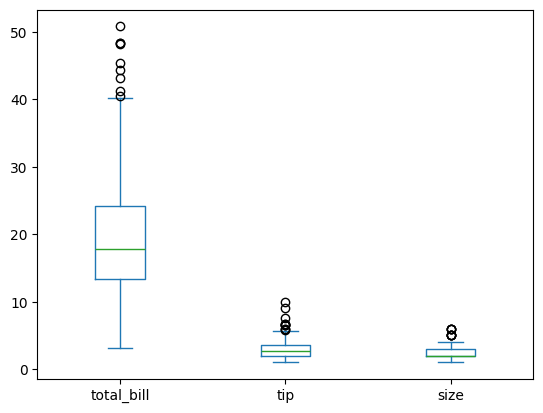

In [ ]:
tips_clean.plot.box()

<Axes: xlabel='total_bill', ylabel='tip'>

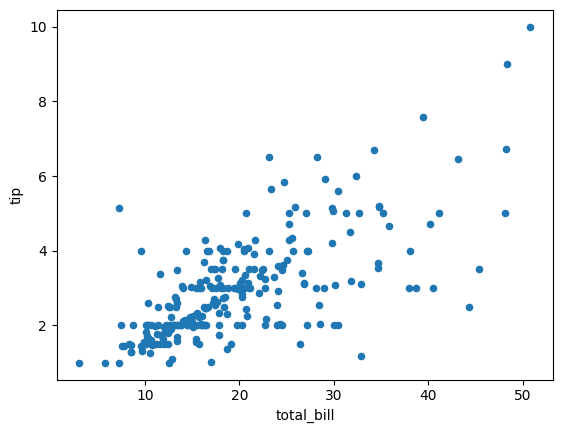

In [ ]:
tips_clean.plot.scatter(x='total_bill',y='tip')

In [ ]:
tips_clean.groupby('day',observed=False)['total_bill'].sum()

,total_bill
day,
Fri,325.88
Sat,1778.40
Sun,1627.16
Thur,1083.33


In [ ]:
tips_clean.groupby('day',observed=False).mean(numeric_only=True)

,total_bill,tip,size
day,,,
Fri,17.151579,2.681579,2.105263
Sat,20.441379,2.977471,2.517241
Sun,21.410000,3.204737,2.842105
Thur,17.759508,2.770164,2.459016


<Axes: xlabel='day'>

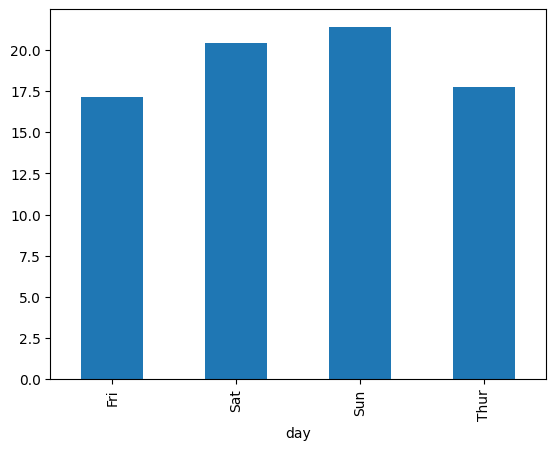

In [ ]:
grouped = tips_clean.groupby('day',observed=False)
avg_bill_day = grouped['total_bill'].mean()
avg_bill_day.plot.bar()

In [ ]:
grouped

In [ ]:
tips_clean.groupby('sex')['tip'].agg(['sum','mean','size'])

,sum,mean,size
sex,,,
Unknown,65.79,2.741250,24
female,214.68,2.862400,75
male,442.06,3.069861,144


In [ ]:
tips_clean.groupby(['sex','time'])['tip'].agg(['mean','size'])

mean  size
sex     time                  
Unknown Dinner  3.082000    15
        Lunch   2.173333     9
female  Dinner  2.982444    45
        Lunch   2.682333    30
male    Dinner  3.107241   116
        Lunch   2.915000    28

In [ ]:
tips_clean.groupby(['sex','time'])['tip'].agg(['mean','size']).reset_index()

,sex,time,mean,size
0,Unknown,Dinner,3.082000,15
1,Unknown,Lunch,2.173333,9
2,female,Dinner,2.982444,45
3,female,Lunch,2.682333,30
4,male,Dinner,3.107241,116
5,male,Lunch,2.915000,28


데이터 분석을 위한 데이터 구조화
===

## [1] 데이터 요약하기 - 응용

### (1) apply : 사용자 정의함수 적용하기

In [ ]:
def tip_gap(group):
    return group['tip'].max() - group['tip'].min()

In [ ]:
tips_clean.groupby(['sex','time']).apply(tip_gap).reset_index()

/tmp/ipython-input-1847848080.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tips_clean.groupby(['sex','time']).apply(tip_gap).reset_index()


,sex,time,0
0,Unknown,Dinner,7.90
1,Unknown,Lunch,2.22
2,female,Dinner,5.50
3,female,Lunch,5.11
4,male,Dinner,9.00
5,male,Lunch,5.41


(+) smoker 컬럼을 기준으로 그룹화하고, 각 그룹의 최대 총액과 최소 총액의 차(total_bill)를 구하세요.

In [ ]:
tips_clean.groupby('smoker').apply(lambda group:group['total_bill'].max() - group['total_bill'].min())

/tmp/ipython-input-3918846135.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tips_clean.groupby('smoker').apply(lambda group:group['total_bill'].max() - group['total_bill'].min())


,0
smoker,
False,41.08
True,47.74


### (2) filter : 특정 그룹만 남기기

[공식문서](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.filter.html#pandas.core.groupby.DataFrameGroupBy.filter) 참고!

In [ ]:
tips_clean.groupby(['sex','smoker']).filter(lambda group: group['tip'].mean() > 3)

,total_bill,tip,sex,smoker,day,time,size
0,9.94,1.56,male,False,Sun,Dinner,2
1,9.78,1.47,male,False,Thur,Lunch,2
3,9.60,4.00,female,True,Sun,Dinner,2
4,9.55,1.45,male,False,Sat,Dinner,2
6,8.58,1.29,male,True,Fri,Lunch,1
...,...,...,...,...,...,...,...
233,10.59,1.61,female,True,Sat,Dinner,2
235,10.34,1.66,male,False,Sun,Dinner,3
236,10.34,2.00,male,True,Thur,Lunch,2
240,10.27,1.71,male,False,Sun,Dinner,2


### (3) transform : 그룹 기준 값으로 컬럼 추가

In [ ]:
tips_clean.groupby('sex')['total_bill'].mean()

,total_bill
sex,
Unknown,17.025833
female,18.012933
male,21.216528


In [ ]:
tips_clean.groupby('sex')['total_bill'].transform('mean')

,total_bill
0,21.216528
1,21.216528
2,17.025833
3,18.012933
4,21.216528
...,...
239,18.012933
240,21.216528
241,18.012933
242,18.012933


In [ ]:
tips_clean.head()

,total_bill,tip,sex,smoker,day,time,size
0,9.94,1.56,male,False,Sun,Dinner,2
1,9.78,1.47,male,False,Thur,Lunch,2
2,9.68,1.32,Unknown,False,Sun,Dinner,2
3,9.60,4.00,female,True,Sun,Dinner,2
4,9.55,1.45,male,False,Sat,Dinner,2


In [ ]:
tips_clean.loc[:,'avg_bill_by_sex'] = tips_clean.groupby('sex')['total_bill'].transform('mean')

In [ ]:
tips_clean.head()

,total_bill,tip,sex,smoker,day,time,size,avg_bill_by_sex
0,9.94,1.56,male,False,Sun,Dinner,2,21.216528
1,9.78,1.47,male,False,Thur,Lunch,2,21.216528
2,9.68,1.32,Unknown,False,Sun,Dinner,2,17.025833
3,9.60,4.00,female,True,Sun,Dinner,2,18.012933
4,9.55,1.45,male,False,Sat,Dinner,2,21.216528


## [2] 데이터 합치기

### (1) concat : 연결하기

`pd.concat()` : 행방향 / 열방향 단순 연결


[공식문서](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1'], 'B': ['B0', 'B1']})
df2 = pd.DataFrame({'A': ['A2', 'A3'], 'B': ['B2', 'B3']})

In [ ]:
df1

,A,B
0,A0,B0
1,A1,B1


In [ ]:
df2

,A,B
0,A2,B2
1,A3,B3


In [ ]:
# 행 방향 연결
pd.concat([df1, df2])

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [ ]:
pd.concat([df1, df2], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [ ]:
# objs로 들어온 데이터프레임이 몇 개든지 다 연결해 준다.
pd.concat([df1, df2, df1, df1, df2])

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3
0,A0,B0
1,A1,B1
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [ ]:
# 열 방향 연결
pd.concat([df1, df2],axis=1)

,A,B,A,B
0,A0,B0,A2,B2
1,A1,B1,A3,B3


### (2) merge : 병합하기

`pd.merge()`

[공식문서](https://pandas.pydata.org/docs/reference/api/pandas.merge.html)

In [ ]:
import pandas as pd

df_left = pd.DataFrame({'K': ['K0', 'K1', 'K2', 'K3'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

df_right = pd.DataFrame({'K': ['K0', 'K1', 'K2','K4'],
                         'C': ['C0', 'C1', 'C2','C3'],
                         'D': ['D0', 'D1', 'D2','D3']})

In [ ]:
df_left

,K,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [ ]:
df_right

,K,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K4,C3,D3


1. inner join

In [ ]:
pd.merge(df_left, df_right, on='K', how='inner')

,K,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


2. left join

In [ ]:
pd.merge(df_left, df_right, on='K', how='left')

,K,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,NaN,NaN


## [3] 데이터 재구조화

In [ ]:
df = pd.DataFrame({
    "customer": ["A", "B"],
    "2024-06": [100, 200],
    "2024-07": [110, 210],
    "2024-08": [130, 190]
}
)

df # wide 한 형태

,customer,2024-06,2024-07,2024-08
0,A,100,110,130
1,B,200,210,190


In [ ]:
# 어떻게 그릴 수 있을까?
# df.plot.line(x='?????')

In [ ]:
df_melted = df.melt(id_vars='customer', # 식별열
                    var_name='month',   # 열(변수) 이름 지정
                    value_name='sales') # 열(값) 이름 지정
df_melted

,customer,month,sales
0,A,2024-06,100
1,B,2024-06,200
2,A,2024-07,110
3,B,2024-07,210
4,A,2024-08,130
5,B,2024-08,190


In [ ]:
df_melted.dtypes

,0
customer,object
month,object
sales,int64


In [ ]:
df_melted.shape

(6, 3)

<Axes: xlabel='month'>

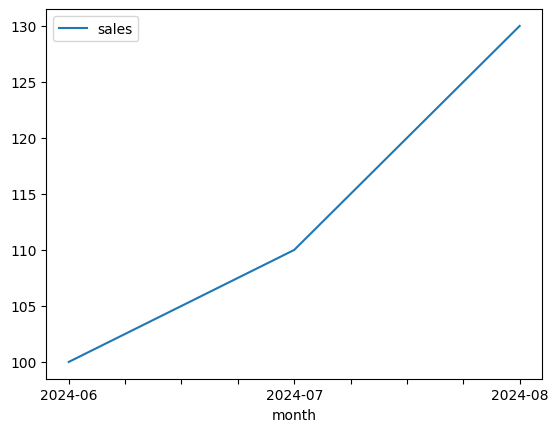

In [ ]:
df_melted[df_melted['customer'] == 'A'].plot.line(x='month',y='sales')

### (2) pivot : long -> wide (중복X)

In [ ]:
long_df = pd.DataFrame({
    'Date': ['2021-01-01', '2021-01-01', '2021-01-02', '2021-01-02'],
    'Type': ['A', 'B', 'A', 'B'],
    'Value': [100, 200, 300, 400]
})

In [ ]:
long_df

,Date,Type,Value
0,2021-01-01,A,100
1,2021-01-01,B,200
2,2021-01-02,A,300
3,2021-01-02,B,400


In [ ]:
long_df.pivot(index='Date',
              columns='Type',
              values='Value')

Type,A,B
Date,,
2021-01-01,100,200
2021-01-02,300,400


In [ ]:
# 중복되는 상황을 만듦
long_df.loc[len(long_df),:] = ['2021-01-02','B',500]

In [ ]:
long_df

,Date,Type,Value
0,2021-01-01,A,100.0
1,2021-01-01,B,200.0
2,2021-01-02,A,300.0
3,2021-01-02,B,400.0
4,2021-01-02,B,500.0


In [ ]:
# long_df.pivot(index='Date',
#               columns='Type',
#               values='Value')

ValueError: Index contains duplicate entries, cannot reshape

### (3) pivot_table : long -> wide (중복O)

In [ ]:
long_df.pivot_table(index='Date',
                    columns='Type',
                    values='Value',
                    aggfunc='sum')

Type,A,B
Date,,
2021-01-01,100.0,200.0
2021-01-02,300.0,900.0


### (4) unstack : long(멀티 인덱스) -> wide

In [ ]:
long_df.groupby(['Date','Type'])['Value'].sum()

Date        Type
2021-01-01  A       100.0
            B       200.0
2021-01-02  A       300.0
            B       900.0
Name: Value, dtype: float64

In [ ]:
long_df.groupby(['Date','Type'])['Value'].sum().unstack()

Type,A,B
Date,,
2021-01-01,100.0,200.0
2021-01-02,300.0,900.0


In [ ]:
long_df.groupby(['Date','Type'])['Value'].sum().unstack().reset_index()

Type,Date,A,B
0,2021-01-01,100.0,200.0
1,2021-01-02,300.0,900.0


데이터 시각화
===

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 95.5 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib

<Axes: title={'center': '팁과 영수금액 간 관계'}, xlabel='total_bill', ylabel='tip'>

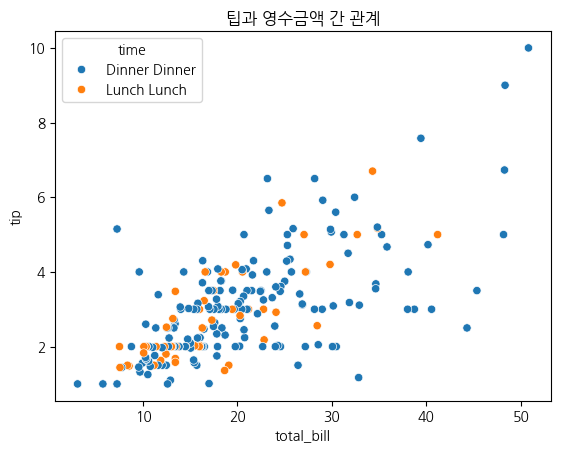

In [ ]:
plt.title('팁과 영수금액 간 관계')
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')

# axes level

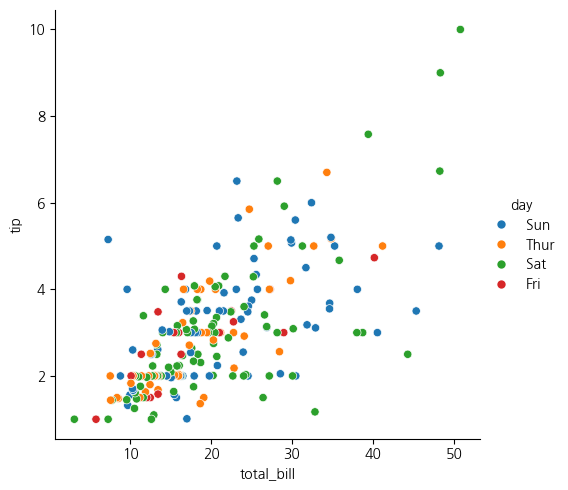

In [ ]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='day')

# fig level = 도화지 전체